In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../DATA/부산광역시_전체_세대_및_인구개황_20210328195505.csv')
df.head()

,구·군별,2020. 11,2020. 11.1,2020. 11.2,2020. 11.3,2020. 11.4,2020. 11.5,2020. 11.6,2020. 11.7,2020. 12,...,2020. 12.6,2020. 12.7,2021. 01,2021. 01.1,2021. 01.2,2021. 01.3,2021. 01.4,2021. 01.5,2021. 01.6,2021. 01.7
0,구·군별,읍면동수 (개),세대수 (세대),인구수 (명),남자인구수 (명),여자인구수 (명),시전체 인구에 대한 구성비 (%),면적 (㎢),인구밀도 (명/㎢),읍면동수 (개),...,면적 (㎢),인구밀도 (명/㎢),읍면동수 (개),세대수 (세대),인구수 (명),남자인구수 (명),여자인구수 (명),시전체 인구에 대한 구성비 (%),면적 (㎢),인구밀도 (명/㎢)
1,부산광역시,205,1527721,3442633,1688633,1754000,100.0,770.07,4471,205,...,770.07,4465,205,1532700,3435787,1684737,1751050,100.0,770.07,4462
2,중구,9,23773,43571,21609,21962,1.3,2.83,15396,9,...,2.83,15412,9,23923,43657,21599,22058,1.3,2.83,15427
3,서구,13,53724,110027,53535,56492,3.2,13.98,7870,13,...,13.96,7883,13,53881,109876,53464,56412,3.2,13.96,7871
4,동구,12,46003,91194,44619,46575,2.6,9.87,9240,12,...,9.86,9235,12,46081,90905,44464,46441,2.6,9.86,9220


## 월별로 데이터 묶기

In [4]:
def groupbyMonth(year, month):
    columns = ['구·군별', '{}. {}'.format(year, month)]
    for i in range(1, 8):
        columns.append('{}. {}.{}'.format(year, month, i))
    return columns

In [5]:
data = {}
dates = [('2020', '11'), ('2020', '12'), ('2021', '01')]

In [6]:
for date in dates:
    year, month = date
    cols = groupbyMonth(year, month)
    data['{}_{}'.format(year, month)] = df[cols].rename(columns=df[cols].iloc[0])
    data['{}_{}'.format(year, month)] = data['{}_{}'.format(year, month)].drop(axis=0, index=0)

In [7]:
data['2020_11'].head(3)

,구·군별,읍면동수 (개),세대수 (세대),인구수 (명),남자인구수 (명),여자인구수 (명),시전체 인구에 대한 구성비 (%),면적 (㎢),인구밀도 (명/㎢)
1,부산광역시,205,1527721,3442633,1688633,1754000,100.0,770.07,4471
2,중구,9,23773,43571,21609,21962,1.3,2.83,15396
3,서구,13,53724,110027,53535,56492,3.2,13.98,7870


In [8]:
data['2020_12'].head(3)

,구·군별,읍면동수 (개),세대수 (세대),인구수 (명),남자인구수 (명),여자인구수 (명),시전체 인구에 대한 구성비 (%),면적 (㎢),인구밀도 (명/㎢)
1,부산광역시,205,1530431,3438710,1686412,1752298,100.0,770.07,4465
2,중구,9,23847,43617,21621,21996,1.3,2.83,15412
3,서구,13,53853,110051,53521,56530,3.2,13.96,7883


In [9]:
data['2021_01'].head(3)

,구·군별,읍면동수 (개),세대수 (세대),인구수 (명),남자인구수 (명),여자인구수 (명),시전체 인구에 대한 구성비 (%),면적 (㎢),인구밀도 (명/㎢)
1,부산광역시,205,1532700,3435787,1684737,1751050,100.0,770.07,4462
2,중구,9,23923,43657,21599,22058,1.3,2.83,15427
3,서구,13,53881,109876,53464,56412,3.2,13.96,7871


## 각 구,군별로 (인구수, 세대수, 인구밀도) 순위 분석

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') # For Windows
color=['red', 'green', 'blue']

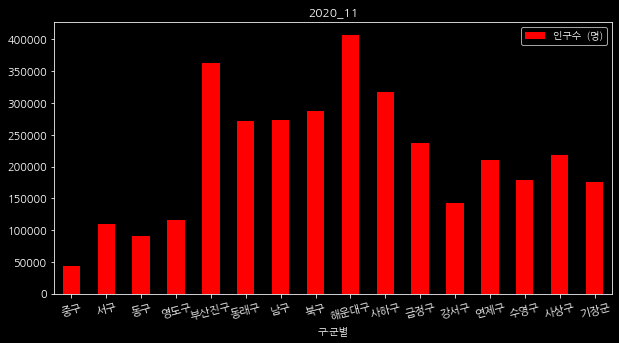

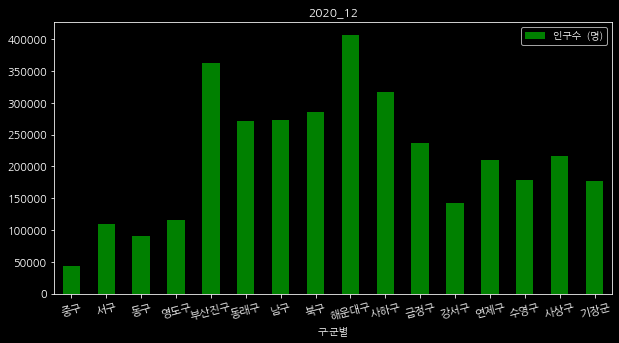

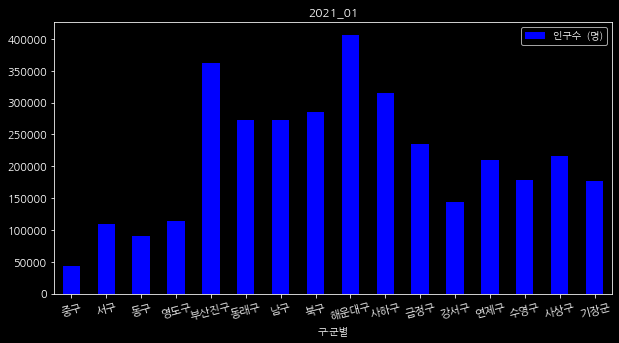

In [32]:
for i, date in enumerate(dates):
    year, month = date
    col = '{}_{}'.format(year, month)
    df = data[col].drop(axis=0, index=1)
    df['인구수  (명)'] = pd.to_numeric(df['인구수  (명)'])
    plt_data = df[['구·군별', '인구수  (명)']]
    plt_data.plot(kind='bar', x='구·군별', y='인구수  (명)', color=color[i], figsize=(10, 5), rot=15, title=col, fontsize=11)
plt.show()

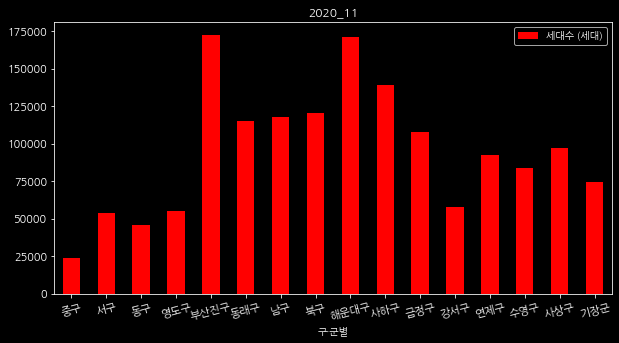

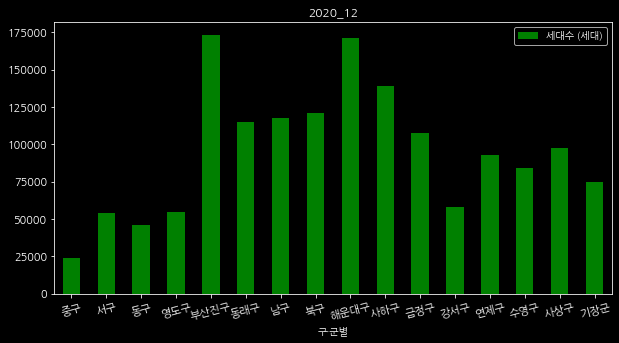

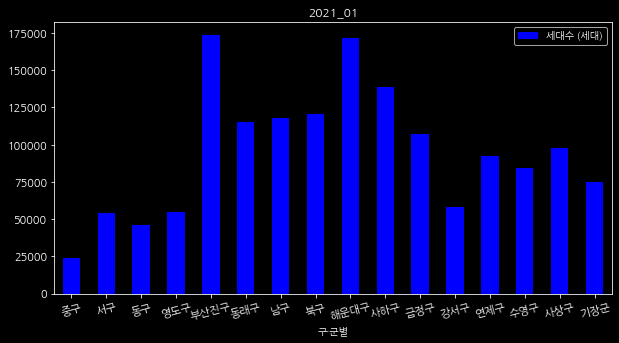

In [34]:
for i, date in enumerate(dates):
    year, month = date
    col = '{}_{}'.format(year, month)
    df = data[col].drop(axis=0, index=1)
    df['세대수 (세대)'] = pd.to_numeric(df['세대수 (세대)'])
    plt_data = df[['구·군별', '세대수 (세대)']]
    plt_data.plot(kind='bar', x='구·군별', y='세대수 (세대)', color=color[i], figsize=(10, 5), rot=15, title=col, fontsize=11)
plt.show()

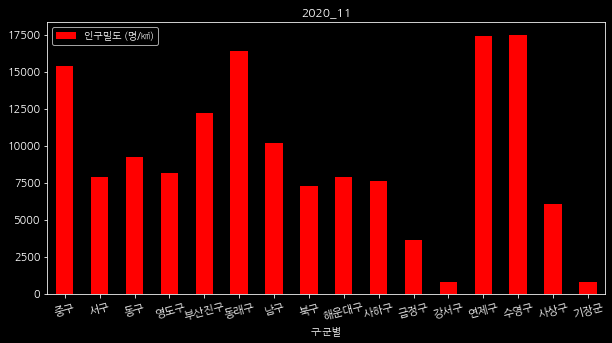

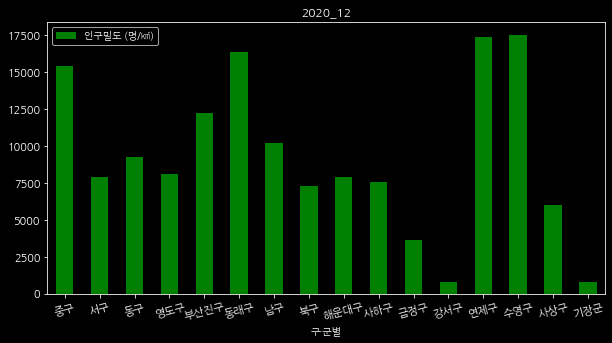

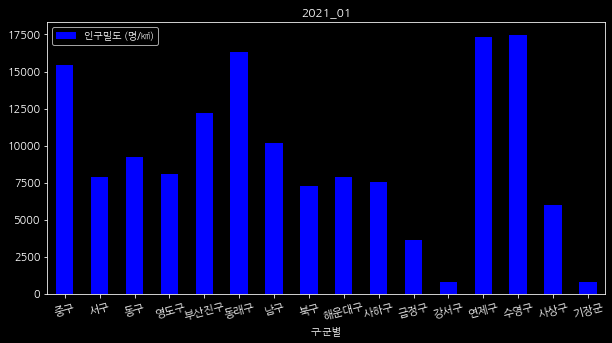

In [70]:
for i, date in enumerate(dates):
    year, month = date
    col = '{}_{}'.format(year, month)
    df = data[col].drop(axis=0, index=1)
    df['인구밀도 (명/㎢)'] = pd.to_numeric(df['인구밀도 (명/㎢)'])
    plt_data = df[['구·군별', '인구밀도 (명/㎢)']]
    plt_data.plot(kind='bar', x='구·군별', y='인구밀도 (명/㎢)', color=color[i], figsize=(10, 5), rot=15, title=col, fontsize=11)

## 총 인구수의 변화

In [187]:
import numpy as np
import matplotlib.pyplot as plt
population = pd.DataFrame(columns=['인구수  (명)', '남자인구수 (명)', '여자인구수 (명)'])
for i, date in enumerate(dates):
    year, month = date
    col = '{}_{}'.format(year, month)
    total = int(data[col].iloc[0]['인구수  (명)'])
    man = int(data[col].iloc[0]['남자인구수 (명)'])
    woman = int(data[col].iloc[0]['여자인구수 (명)'])
    population = population.append(pd.DataFrame(np.array([[total, man, woman]]), columns=population.columns, index=[col]))

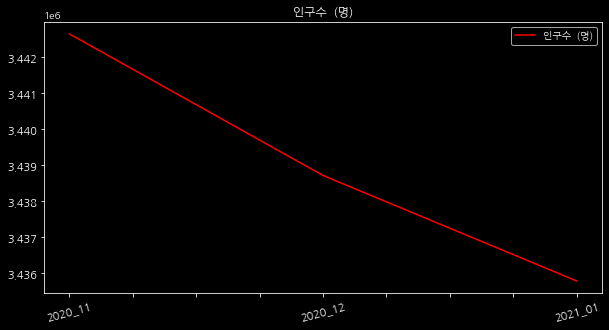

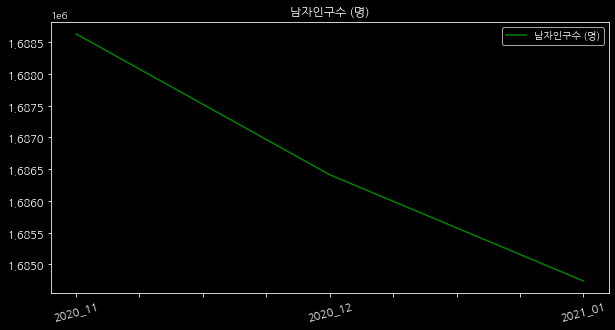

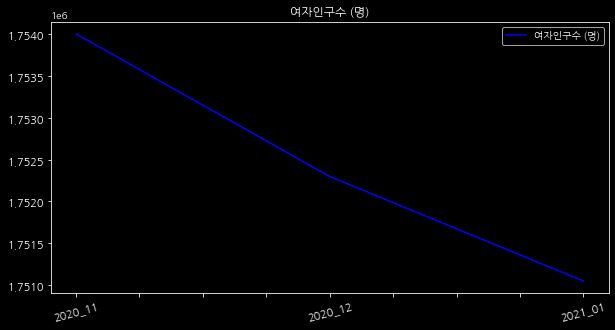

In [205]:
for i, col in enumerate(population.columns):
    population[[col]].plot(color=color[i], figsize=(10, 5), rot=15, title=col, fontsize=11)

## 인구 수 / 세대수 로 1인가구를 구함
1인가구가 많을 수록 작은 무인점포가 인기가 많을 것이라고 생각

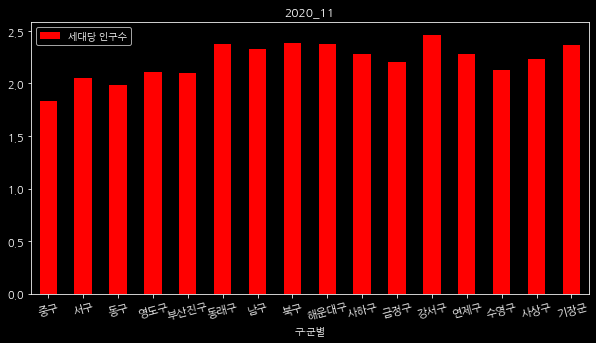

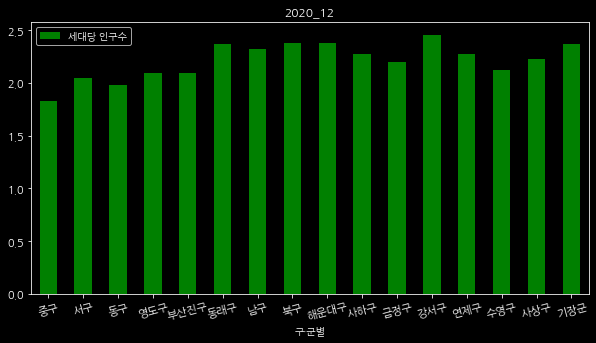

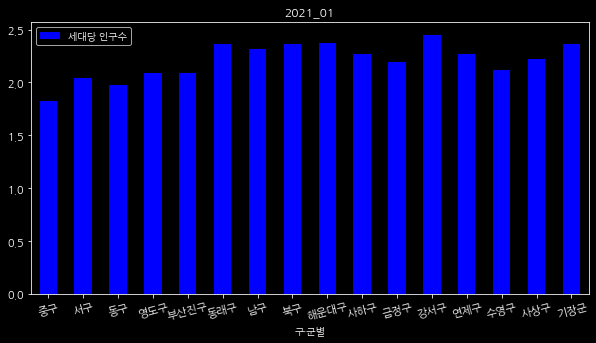

In [214]:
for i, date in enumerate(dates):
    year, month = date
    col = '{}_{}'.format(year, month)
    df = data[col].drop(axis=0, index=1)
    df['세대수 (세대)'] = pd.to_numeric(df['세대수 (세대)'])
    df['인구수  (명)'] = pd.to_numeric(df['인구수  (명)'])
    df['세대당 인구수'] = df['인구수  (명)']/ df['세대수 (세대)']
    plt_data = df[['구·군별', '세대당 인구수']]
    plt_data.plot(kind='bar', x='구·군별', y='세대당 인구수', color=color[i], figsize=(10, 5), rot=15, title=col, fontsize=11)